In [1]:
import math
import mpmath

Here, I implement a `Radical_s2` class, which has two values `a, b` of type int. It will be used to define a value of $a + b\sqrt{2}$. Here, for the sake of necessity, I implement three methods: a constructor for iniitialization, addition and subtraction, and the comparision operator $<$

To implement the operator $<$ between two `Radical_s2`, without using floating-point arithmetic, we assume that there are two radicals $a + b\sqrt{2}$ and $c + d\sqrt{2}$, and let $a + b\sqrt{2} < c + d\sqrt{2}$. Then, we have:

$$
a + b\sqrt{2} < c + d\sqrt{2} \\
\Rightarrow (a - c) + (b - d)\sqrt{2} < 0 \\
\Rightarrow (a - c) < (d - b)\sqrt{2} \\
$$

If $b = d$ then the results depends on $a - c$, and vice versa for $a - c$. Otherwise, if both are nonzero:

Let $x = a - c, y = b - d$, with both nonzero (since we did the zero check above). Now we have the equation: 

$$
x < y\sqrt{2}
$$

We focus on the signs of these variables:

$$
\begin{cases}
x <= 0, y >= 0 \Rightarrow True \\
x >= 0, y <= 0 \Rightarrow False
\end{cases}
$$

We have two cases, where $x$ and $y$ has the same sign. If both $x > 0, y > 0$, then we can easily take 

$$
x < y\sqrt{2} \Rightarrow \frac{x}{y} < \sqrt{2} \Rightarrow \frac{x^2}{y^2} < 2 \Rightarrow x^2 < 2y^2
$$

and do the same except flip the sign for $x < 0, y < 0$, except we flip the sign.

In [2]:
from typing import Any

In [3]:
def sgn(n: int) -> int:
    # sign function to aid comparison
    if n == 0: return 0
    return -1 if n < 0 else 1

class Radical_s2:
    def __init__(self, a: int, b: int = 0) -> None:
        self.a: int = a
        self.b: int = b
    
    def __add__(self, other: Any) -> "Radical_s2":
        if isinstance(other, int):
            other = Radical_s2(other, 0)
        return Radical_s2(self.a + other.a, self.b + other.b)
    
    def __sub__(self, other: Any) -> "Radical_s2":
        if isinstance(other, int):
            other = Radical_s2(other, 0)
        return Radical_s2(self.a - other.a, self.b - other.b)
    
    def __mul__(self, other: Any) -> "Radical_s2":
        if isinstance(other, int):
            other = Radical_s2(other, 0)
        a = self.a 
        b = self.b
        c = other.a
        d = other.b
        return Radical_s2(a*c + 2*b*d, a*d + b*c)

    
    def __eq__(self, other: Any) -> bool:
        if isinstance(other, int):
            other = Radical_s2(other, 0)
        return self.a == other.a and self.b == other.b
    
    def __lt__(self, other: Any) -> bool:
        # variables to copy the progress above
        if isinstance(other, int):
            other = Radical_s2(other, 0)
        elif isinstance(other, float):
            return float(self) < float(other) # cba to write the whole thing
        a = self.a
        b = self.b
        c = other.a
        d = other.b
        # some basic comparisons
        if a == c and b == d: return False
        elif a == c and b != d: return b < d
        elif b == d and a != c: return a < c
        # sign compare
        else:
            x = a - c
            y = d - b
            # the equal signs are just for fun, we already check for them
            if x <= 0 and y >= 0: return True
            elif x >= 0 and y <= 0: return False
            
            elif x >= 0 and y >= 0: return x ** 2 <= 2 * (y ** 2)
            else: return x ** 2 >= 2 * (y ** 2) # flip the sign
    
    def __gt__(self, other: "Radical_s2") -> bool:
        # excat same thing, just flip signs
        # variables to copy the progress above
        if isinstance(other, int):
            other = Radical_s2(other, 0) # at this point idc anymore
        elif isinstance(other, float):
            return float(self) > float(other)  # cba to write the whole thing
        a = self.a
        b = self.b
        c = other.a
        d = other.b
        if a == c and b == d: return False
        elif a == c and b != d: return b > d
        elif b == d and a != c: return a > c
        else:
            x = a - c
            y = d - b
            if x <= 0 and y >= 0: return False
            elif x >= 0 and y <= 0: return True
            elif x >= 0 and y >= 0: return x ** 2 >= 2 * (y ** 2)
            else: return x ** 2 <= 2 * (y ** 2) # flip the sign
    
    def __float__(self) -> float:
        # convert to float to check by eye
        return float(self.a) + math.sqrt(2) * self.b 
    
    def __str__(self) -> str:
        return f"{self.a} " + ("+" if self.b > 0 else "-") + f" {abs(self.b)}√2"

In [4]:
print(Radical_s2(5, 2) * 14)

70 + 28√2


In [5]:
a = Radical_s2(-3, 6)
b = Radical_s2(2, -123)
print(float(a))
print(float(b))
print(a > b)

5.485281374238571
-171.9482681718907
True


In [6]:
Radical_s2(1, 1) > 3

False

Now we implement the closest integer function. Consider a radical $a + b\sqrt{2}$. Since $a$ is already an integer, we investigate the case of $b\sqrt{2}$, and then add $a$ to the result. We can do by simply taking the square root of $2b^2$ and compare that to integers. But since we don't use floating point, we square them up, and compare the distances.

Also luckily the answer is always definite, since $\frac{v^2 + (v + 1)^2}{2}$ can never be an integer, in other words, $2b^2$ can never lie perfectly in between $v^2$ and $(v + 1)^2$, and will therefore be bias towards one. So we just check which is closer, and return the corresponding value. EZ

In [7]:
def closest_integer_to_s2(r: int) -> int:
    sq = 2 * r * r # precompute this value
    v = math.isqrt(sq)
    
    # now we compare 2 * b * b to see which is closer, v^2 or (v + 1)^2. Return the closer one
    x = abs(sq - v * v)
    y = abs(sq - (v + 1) * (v + 1))
    
    # check closer
    result = 0
    if x < y: result = v
    elif x > y: result = v + 1
    
    return result 

def closest_integer(r: Radical_s2) -> int:
    return r.a + closest_integer_to_s2(r.b)

for i in range(20):
    t = Radical_s2(0, i)
    print(float(t), closest_integer(t))

0.0 0
1.4142135623730951 1
2.8284271247461903 3
4.242640687119286 4
5.656854249492381 6
7.0710678118654755 7
8.485281374238571 8
9.899494936611665 10
11.313708498984761 11
12.727922061357857 13
14.142135623730951 14
15.556349186104047 16
16.970562748477143 17
18.38477631085024 18
19.79898987322333 20
21.213203435596427 21
22.627416997969522 23
24.041630560342618 24
25.455844122715714 25
26.870057685088806 27


In [8]:
# now let's actually go to the logic

# f(n): distance between n\sqrt{2} and the closest integer to that number

def f(n: int) -> Radical_s2:
    a = closest_integer_to_s2(n)
    # -a + n\sqrt{2}, or a - n\sqrt{2}
    return Radical_s2(-a, n) if Radical_s2(0, n) > a else Radical_s2(a, -n)

a = 5
print(f(a) * a) 
print(float(f(a) * a))

-35 + 25√2
0.3553390593273775


In [14]:
# and now, the final function
def L(n: int) -> Radical_s2:
    return f(n) * n

In [15]:
# nơ we can finally do it
t = 10 ** 10
for i in range(1, 10 ** 6 + 1):
    if L(i) < t:
        print(i)
        t = L(i)
        z = i
print(t)
print(z)
print(float(t))

1
2
6 - 4√2
2
0.3431457505076194


In [10]:
Radical_s2(-7, 5) < Radical_s2(6, -4)

True

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
z = np.arange(1, 1001)
v = np.array()

In [28]:
def f(a: float) -> float:
    return math.fabs(a - round(a))

def L(n: int) -> float:
    # the function itself
    return n * f(n * math.sqrt(2))

t = 10 ** 10 # some big value
z = 0
for i in range(1, 10 ** 7 + 1):
    if L(i) <= t:
        z = i
        t = L(i)
        
print(z)
print(t)

2
0.3431457505076194


1
0.2679491924311228


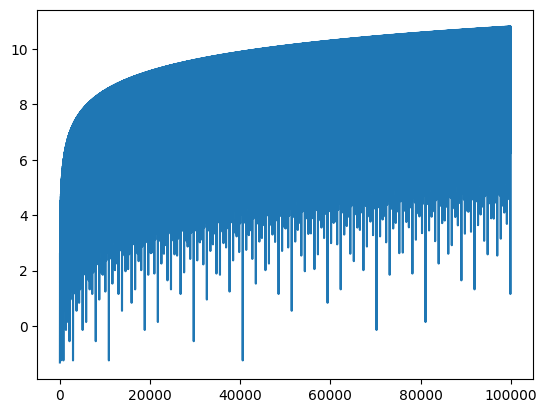

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(a: float) -> float:
    return math.fabs(a - round(a))

def L(n: int) -> float:
    # the function itself
    return n * f(n * math.sqrt(3))

x = np.arange(1, 100001)

y = np.array([np.log(L(i)) for i in x])

t = 10 ** 10  # some big value
z = 0
for i in range(1, 10 ** 7 + 1):
    if L(i) <= t:
        z = i
        t = L(i)

print(z)
print(t)


plt.plot(x, y)